In [1]:
import pandas as pd

In [2]:
import nltk

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SOURAV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
df=pd.read_csv("SMSSpamCollection",sep='\t',names=['label','message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis 

In [7]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
df['length']=df['message'].apply(len)

In [10]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [12]:
df[df['length']==910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [13]:
df[df['length']==2]

,label,message,length
1925,ham,Ok,2
3051,ham,Ok,2
4498,ham,Ok,2
5357,ham,Ok,2


In [15]:
df.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

# Data Visualization

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

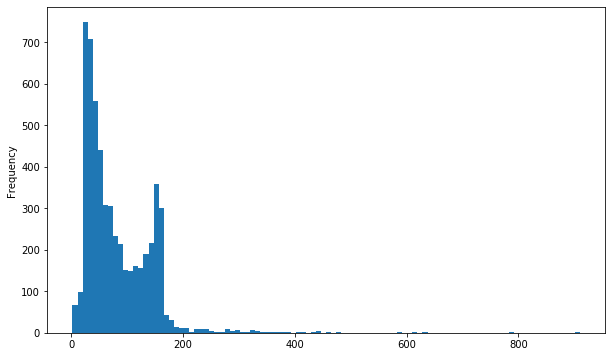

In [22]:
df['length'].plot(kind='hist',bins=100,figsize=(10,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000281F642FD08>,
      dtype=object)

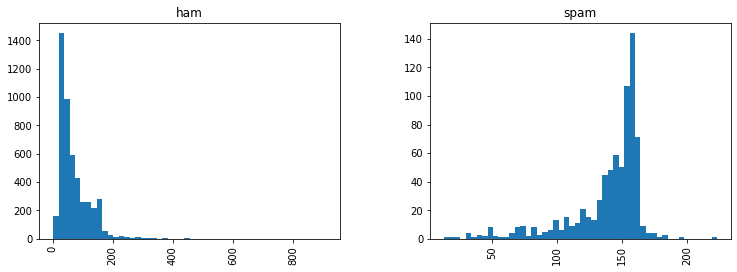

In [25]:
df.hist(column='length', by='label', bins=50,figsize=(12,4))

# *Method - 1*
## Removing Punctuations and Stopwords

In [26]:
import string
punc = string.punctuation

In [27]:
from nltk.corpus import stopwords

In [28]:
def clean (mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Join char. to form string again
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """ 
    no_punc = [x for x in mess if x not in punc]
    data = ''.join(no_punc)
    proper = [y for y in data.split() if y.lower() not in stopwords.words('english') ]
    return proper


In [31]:
df['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [30]:
clean(df['message'][0])

['Go',
 'jurong',
 'point',
 'crazy',
 'Available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'got',
 'amore',
 'wat']

# Vectorization

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
vector=CountVectorizer(analyzer=clean).fit(df['message'])

In [67]:
bow_new=vector.transform(df['message'])

In [68]:
bow_new

<5572x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [45]:
msg4=df['message'][3]
msg4

'U dun say so early hor... U c already then say...'

In [48]:
bow4=bow.transform([msg4])
bow4

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [49]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [50]:
print(bow.get_feature_names()[4068])
print(bow.get_feature_names()[9554])

U
say


In [51]:
print('Shape of Sparse Matrix: ', bow_new.shape)

Shape of Sparse Matrix:  (5572, 11425)


# Tfidf Transformation

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer

In [69]:
tfidf=TfidfTransformer().fit(bow_new)

In [70]:
low_new=tfidf.transform(bow_new)
low_new

<5572x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 50548 stored elements in Compressed Sparse Row format>

# Training the model

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [72]:
model=MultinomialNB()

In [76]:
model1=model.fit(low_new,df['label'])


In [80]:
pred=model1.predict(low_new)
pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

# Model Evaluation

In [81]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(df['label'],pred ))
print('\n')
print (confusion_matrix(df['label'],pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



[[4825    0]
 [ 115  632]]


# *Method - 2*

In [82]:
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Train Test Split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
xtrain,xtest,ytrain,ytest=train_test_split(df['message'],df['label'],test_size=0.3)

# Creating a Data Pipeline

In [85]:
from sklearn.pipeline import Pipeline

In [87]:
mymodel=Pipeline([
    ('vector',CountVectorizer(analyzer=clean)),
    ('tfidf',TfidfTransformer()),
    ('model',MultinomialNB())])


In [88]:
mymodel.fit(xtrain,ytrain)

Pipeline(memory=None,
         steps=[('vector',
                 CountVectorizer(analyzer=<function clean at 0x00000281F8595318>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [89]:
predic=mymodel.predict(xtest)
predic

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [90]:
ytest

4897     ham
511      ham
2307     ham
1573    spam
4456     ham
        ... 
2960     ham
1067     ham
71       ham
1116     ham
834      ham
Name: label, Length: 1672, dtype: object

In [92]:
print (classification_report(ytest,predic))
print('\n')
print (confusion_matrix(ytest,predic))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1446
        spam       1.00      0.68      0.81       226

    accuracy                           0.96      1672
   macro avg       0.98      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672



[[1446    0]
 [  73  153]]


In [97]:
check=df.iloc[10]['message']
check

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [99]:
mymodel.predict([check])

array(['ham'], dtype='<U4')